In [ ]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Load the data from the CSV file
file_path = '/Users/rygofoss/Desktop/Desktop - fosslaw’s MacBook Pro/AI Class Homework/Starter_Code-4/Resources/crypto_market_data.csv'
crypto_df = pd.read_csv(file_path)

# Select only the numeric columns
crypto_numeric_df = crypto_df.select_dtypes(include=['float64', 'int64'])

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the numeric data
crypto_scaled = scaler.fit_transform(crypto_numeric_df)

# Convert the scaled data back to a DataFrame
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=crypto_numeric_df.columns)

# Display the first few rows of the normalized data
crypto_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [ ]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(crypto_scaled, columns=crypto_numeric_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = crypto_df['coin_id']

# Set the coin_id column as index
scaled_df = scaled_df.set_index('coin_id')

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters and set n_init to 10 explicitly
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


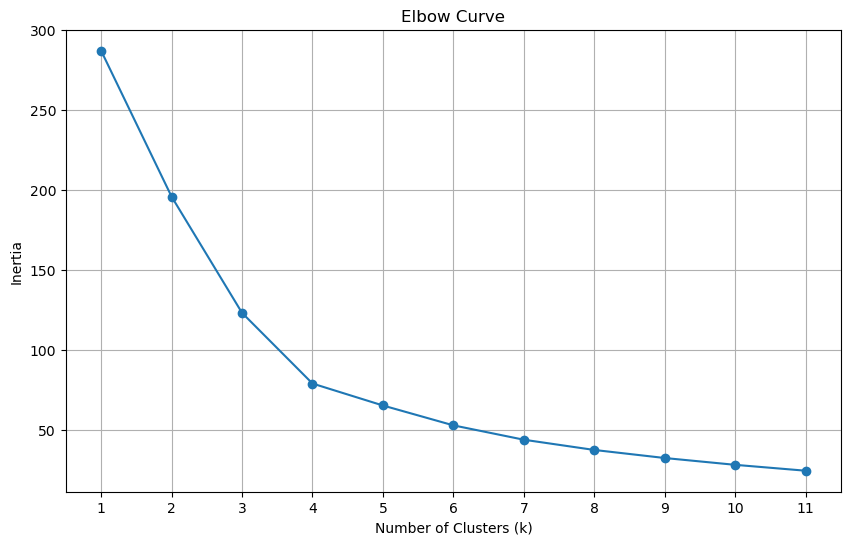

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  The best value appears to be around 4.  The inertia drop slows after this point.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0, n_init=10)


In [ ]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

# Predict the clusters
crypto_clusters = kmeans_model.predict(scaled_df)


In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values
crypto_clusters


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Create a copy of the DataFrame

crypto_scaled_df_copy = scaled_df.copy()

In [ ]:
# Alternatively, if you want to copy the original (unscaled) DataFrame
crypto_df_copy = crypto_df.copy()

In [ ]:
# Add a new column to the scaled DataFrame with the predicted clusters
crypto_scaled_df_copy['Cluster'] = crypto_clusters

# Display sample data
crypto_scaled_df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


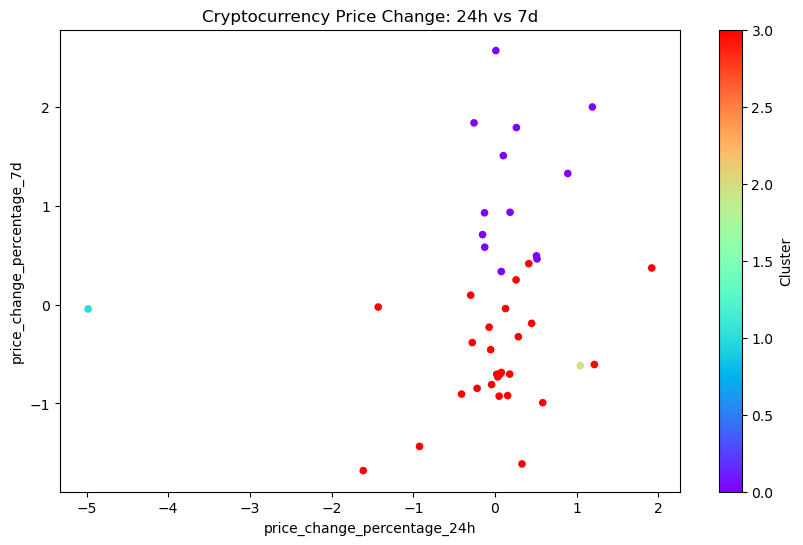

In [ ]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_scaled_df_copy.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",  # Use the cluster labels to color the points
    colormap="rainbow",
    figsize=(10, 6),
    title="Cryptocurrency Price Change: 24h vs 7d"
)

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_transformed_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [ ]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**   Add all three components together to equal 89.5%.

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_transformed_data, 
    columns=['PCA1', 'PCA2', 'PCA3']
)


# Copy the crypto names from the original data
pca_df['coin_id'] = crypto_df['coin_id']

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # 2. Fit the model to the data using the PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


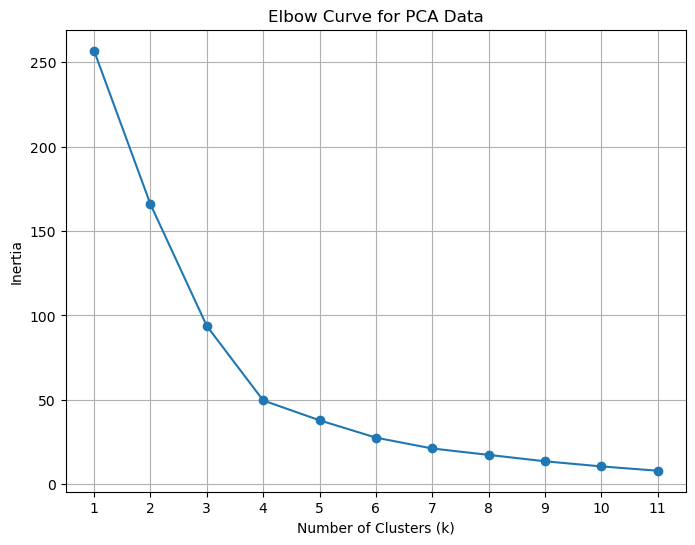

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**   Best value is 4, this is where the decrease slows considerably


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, this is the same value as the original data.  Data strucuter appears retained 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k

best_k_pca = 4
kmeans_pca_model = KMeans(n_clusters=best_k_pca, random_state=0, n_init=10)

In [ ]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(pca_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca_model.predict(pca_df)

# Print the resulting array of cluster values
print(pca_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['crypto_cluster'] = pca_clusters

# Display sample data
pca_df_copy.head(10)


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [ ]:
import hvplot.pandas
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='crypto_cluster',
    colormap='Viridis',
    colorbar=True,
    title='Cryptocurrency Clusters (PCA1 vs PCA2)',
    width=600,
    height=400,
    xlabel='PCA1',
    ylabel='PCA2'
)

# Display the plot
scatter_plot

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.

pca_weights_df = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with principal components
    columns=['PCA1', 'PCA2', 'PCA3'],  # Name the components
    index=scaled_df.columns  # Use the original scaled DataFrame's columns as the index
)

# Display the DataFrame with the weights
pca_weights_df


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PCA1:
Strongest Positive Influence: price_change_percentage_200d (0.594468)
Strongest Negative Influence: price_change_percentage_24h (-0.416728)
PCA2:
Strongest Positive Influence: price_change_percentage_30d (0.562182)
Strongest Negative Influence: price_change_percentage_1y (-0.150789)
PCA3:
Strongest Positive Influence: price_change_percentage_7d (0.787670)
Strongest Negative Influence: price_change_percentage_60d (-0.361377)
    